In [3]:
import pandas as pd 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from data.get_data import get_data_frame
from dotenv import load_dotenv


load_dotenv()

df = get_data_frame(1)

df.head()


Connected to database
[(datetime.datetime(2023, 11, 24, 13, 0), 1114), (datetime.datetime(2023, 11, 24, 13, 15), 1130), (datetime.datetime(2023, 11, 24, 13, 30), 1165), (datetime.datetime(2023, 11, 24, 13, 45), 1201), (datetime.datetime(2023, 11, 24, 14, 0), 1250), (datetime.datetime(2023, 11, 24, 14, 15), 1294), (datetime.datetime(2023, 11, 24, 14, 30), 1335), (datetime.datetime(2023, 11, 24, 14, 45), 1354), (datetime.datetime(2023, 11, 24, 15, 0), 1336), (datetime.datetime(2023, 11, 24, 15, 15), 1346), (datetime.datetime(2023, 11, 24, 15, 30), 1343), (datetime.datetime(2023, 11, 24, 15, 45), 1340), (datetime.datetime(2023, 11, 24, 16, 0), 1316), (datetime.datetime(2023, 11, 24, 16, 15), 1287), (datetime.datetime(2023, 11, 24, 16, 30), 1210), (datetime.datetime(2023, 11, 24, 16, 45), 1157), (datetime.datetime(2023, 11, 24, 17, 0), 1124), (datetime.datetime(2023, 11, 24, 17, 15), 1041), (datetime.datetime(2023, 11, 24, 17, 30), 946), (datetime.datetime(2023, 11, 24, 17, 45), 864), (dat

,timestamp,user_count
0,2023-11-24 13:00:00,1114
1,2023-11-24 13:15:00,1130
2,2023-11-24 13:30:00,1165
3,2023-11-24 13:45:00,1201
4,2023-11-24 14:00:00,1250


In [11]:

df['timestamp'] = pd.to_datetime(df['timestamp'])  
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

features_to_keep = ['month', 'day', 'hour']
X, y = df[features_to_keep], df['user_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBRegressor(n_estimators=1000, learning_rate=0.01)
model.fit(X_train, y_train) 

## test lightgbm

## test MAPIE


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Mean Squared Error: 12628.931556369933
R^2 Score: 0.9447999000549316


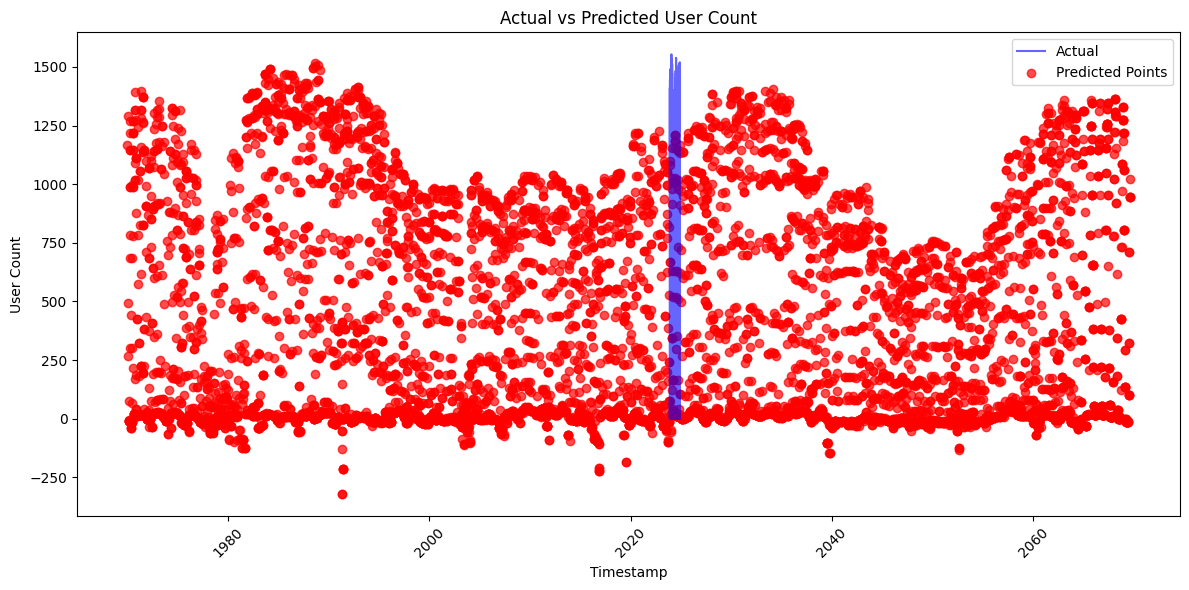

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualization of Actual vs Predicted
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df['timestamp'], df['user_count'], label='Actual', color='blue', alpha=0.6)


# Add scatter points for predicted values
plt.scatter(X_test.index, y_pred, color='red', label='Predicted Points', alpha=0.7)


plt.xlabel('Timestamp')
plt.ylabel('User Count')
plt.title('Actual vs Predicted User Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()